In [ ]:
#gunshot death from 'full_data.csv'

In [2]:
import csv

In [3]:
f=open('full_data.csv','r')
dt=list(csv.reader(f))
dt.extend(['',''])
dt[-2:]

['', '']

In [4]:
def trim(f=dt):
    print('orginal length: %d' % len(dt))
    n=0
    while n<10:
        if f[0][1] == '':
            f=f[1:]
        else: 
            break

        n+=1
    print('fejlecbol levagva: %d' %n)
    n=0
    while n < 10:
        if f[-1] == '':
            f=f[:-1]
        else: break
        n+=1
    print('vegerol levagva: %d' % n)
    print('final length: %d' % len(f))
    return f


In [5]:
data = trim()

orginal length: 100801
fejlecbol levagva: 0
vegerol levagva: 2
final length: 100799


In [6]:
#header listaba
def hd(f=data):
    h = f[0]
    d = f[1:]
    print('adathossz: %d' % len(d) )
    return h,d


In [7]:
#data list header 1st list separate
data = hd()

adathossz: 100798


In [8]:
def unique(f=data):
    dick = {}
    hd = f[0][1:]
    f=f[1]
    
    for idx,v in enumerate(hd):
        n=1
        while n < len(hd):
            l = [i[idx+1] for i in f]
            dick[v] = set(l)
            n+=1
    return dick


In [9]:
uni = unique()
uni.keys()

dict_keys(['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'])

In [10]:
#egyedi ertekek oszloponkent. 
#attekintest ad az ertekek allapotarol
for i in uni:
    print(uni[i])

{'2012', '2014', '2013'}
{'02', '03', '08', '11', '10', '04', '01', '07', '09', '05', '06', '12'}
{'Accidental', 'Homicide', 'NA', 'Suicide', 'Undetermined'}
{'0', '1'}
{'M', 'F'}
{'44', '77', '58', '41', '6', '56', '29', '27', '84', '45', '22', '7', '13', '96', '0', '102', '64', '70', '9', '36', '34', '89', '4', '78', '107', '8', '86', '43', '55', '38', '101', '57', 'NA', '99', '60', '73', '3', '69', '5', '71', '75', '79', '32', '15', '97', '62', '14', '85', '94', '42', '48', '93', '31', '19', '68', '83', '47', '39', '63', '12', '81', '59', '76', '23', '28', '67', '30', '33', '26', '2', '50', '61', '52', '82', '10', '91', '87', '20', '11', '49', '72', '17', '21', '90', '16', '100', '46', '25', '37', '80', '18', '66', '54', '88', '24', '92', '35', '74', '53', '1', '40', '51', '98', '95', '65'}
{'Hispanic', 'Black', 'Asian/Pacific Islander', 'White', 'Native American/Native Alaskan'}
{'242', '238', '225', '224', '998', '220', '299', '211', '200', '271', '234', '291', '280', '222', '261'

In [11]:
#date adat generation for timewise calcuation
import datetime as dtt
#in separate list
dates = [dtt.datetime(year=int(i[1]), month=int(i[2]), day=1) for i in data[1]]
#added to the original data
for i in data[1]:
    d = dtt.datetime(year=int(i[1]),month=int(i[2]),day=1)
    i.append(d)

data[1][1]

['2',
 '2012',
 '01',
 'Suicide',
 '0',
 'F',
 '21',
 'White',
 '100',
 'Street',
 'Some college',
 datetime.datetime(2012, 1, 1, 0, 0)]

In [12]:
len(data[1])

100798

In [13]:
data[0].append('date')
#data[0]=data[0][:-5]
data[0]

['',
 'year',
 'month',
 'intent',
 'police',
 'sex',
 'age',
 'race',
 'hispanic',
 'place',
 'education',
 'date']

In [14]:
#kiszamolja a egyedi ertekek elofordulasat a megadott oszlopban
def countdick(f=data[1], v='year'):
    dick={}
    for idx, val in enumerate(data[0]):
        if v == val:
            n = idx
            for r in data[1]:
                if r[n] not in dick:
                    dick[r[n]] = 0
                dick[r[n]] +=1
    return dick


In [15]:
#egyedileg is behihato
year = countdick()
year

{'2012': 33563, '2013': 33636, '2014': 33599}

In [16]:
#letrehoz egy-egy dictionary-t az oszlop nevevel
#es leszamolja az egyedi ertekek elofordulasat
#az oszlop nevevel meghivhato a dictionary
for i in data[0]:
    vars()[i]=countdick(data[1],i)
    #print(vars()[i])

In [17]:
police

{'0': 99396, '1': 1402}

In [18]:
year
y_count = 0
for i in year:
    y_count= y_count +year[i] 
y_count

100798

In [19]:
uni.keys()

dict_keys(['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'])

In [20]:
race

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [21]:
dates_count = {}
for i in dates:
    if i not in dates_count:
        dates_count[i] = 1
    else:
        dates_count[i] += 1
dates_count

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

In [22]:
#demographic rations
demo = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}

In [23]:
race

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [24]:
#demographic correction of death occurance
def demogrph(n=100000):
    dick = {}
    for key, val in race.items():
        for k,v in demo.items():
            if key == k:
                d = int(race[key]/(demo[k]/n))
                dick[key] = d
    return dick


In [25]:
race_dgraph = demogrph(n=1000000)
race_dgraph

{'Asian/Pacific Islander': 83,
 'Black': 578,
 'Hispanic': 202,
 'Native American/Native Alaskan': 245,
 'White': 335}

In [26]:
#intetional distribution by race

for k ,v in (data[0]):
    for i in data[1]:
        if 

SyntaxError: invalid syntax (<ipython-input-26-cbd5fe19d00c>, line 5)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

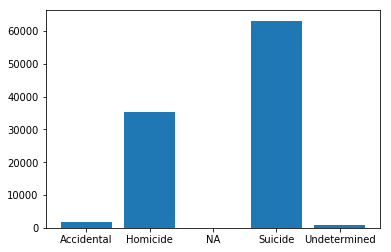

In [28]:
#nem mukodik meg
x = list(intent.keys())
y = intent.values()
plt.bar(x,y)
plt.show()